# SVM Classification 

Importing the dataset

In [1]:
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

Encoding the target feature as factor

In [2]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

Splitting the dataset into the Training set and Test set

In [3]:
library(caTools)
set.seed(123)

Warning message:
"package 'caTools' was built under R version 3.4.3"

In [4]:
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Feature Scaling

In [5]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

Fitting SVM(Linear) to the Training set and Predicting the Test set results

In [6]:
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear')

Warning message:
"package 'e1071' was built under R version 3.4.3"

Predicting the Test set results

In [7]:
y_pred = predict(classifier, newdata = test_set[-3])
y_pred

2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   1   0   1   1 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  1   0   1   1   1   0   1   1   1   1   1   0   1   1   1   0   1   0   0   0 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   1   0   1   1   1   0   1   0   1   1   0   0   0   0 
Levels: 0 1

Making the Confusion Matrix

In [8]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 13 23

Visualising the Training set results

Warning message:
"package 'ElemStatLearn' was built under R version 3.4.3"

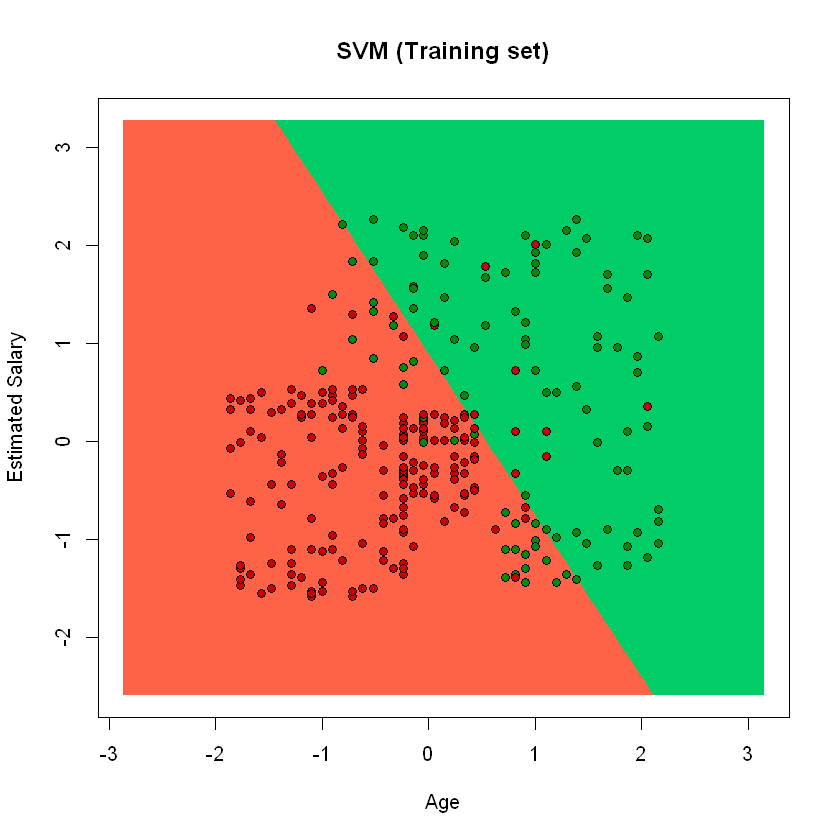

In [9]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Visualising the Test set results

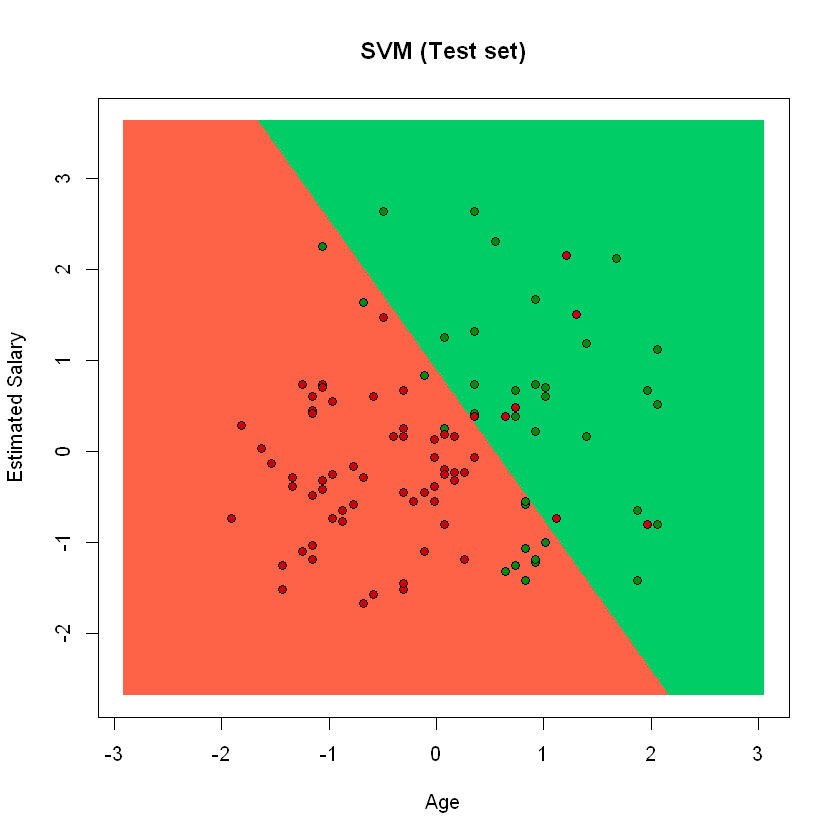

In [10]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Fitting SVM(polynomial) to the Training set and Predicting the Test set results

In [11]:
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'polynomial')


Predicting the Test set results

In [12]:


y_pred = predict(classifier, newdata = test_set[-3])
y_pred

2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   1   0   0   0 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  0   0   0   1   1   0   0   1   1   1   1   0   0   0   0   0   1   0   0   1 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   0   0   0   1   0   0   1   0   1   1   0   0   0   1 
Levels: 0 1

Making the Confusion Matrix

In [14]:

cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 60  4
  1 18 18

Visualising the Training set results

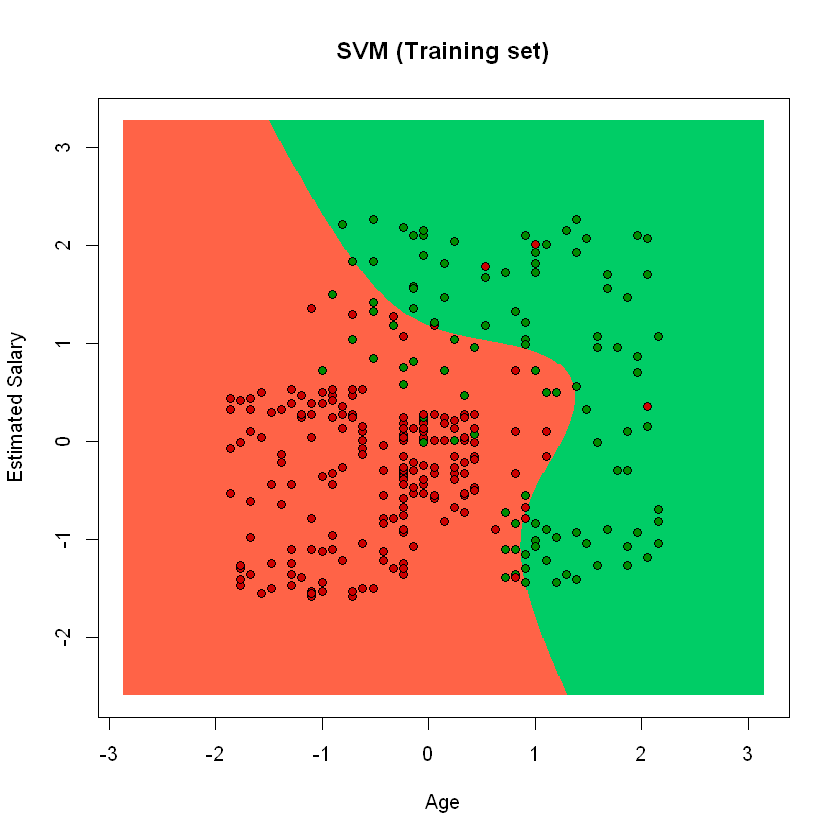

In [15]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))


Visualising the Test set results

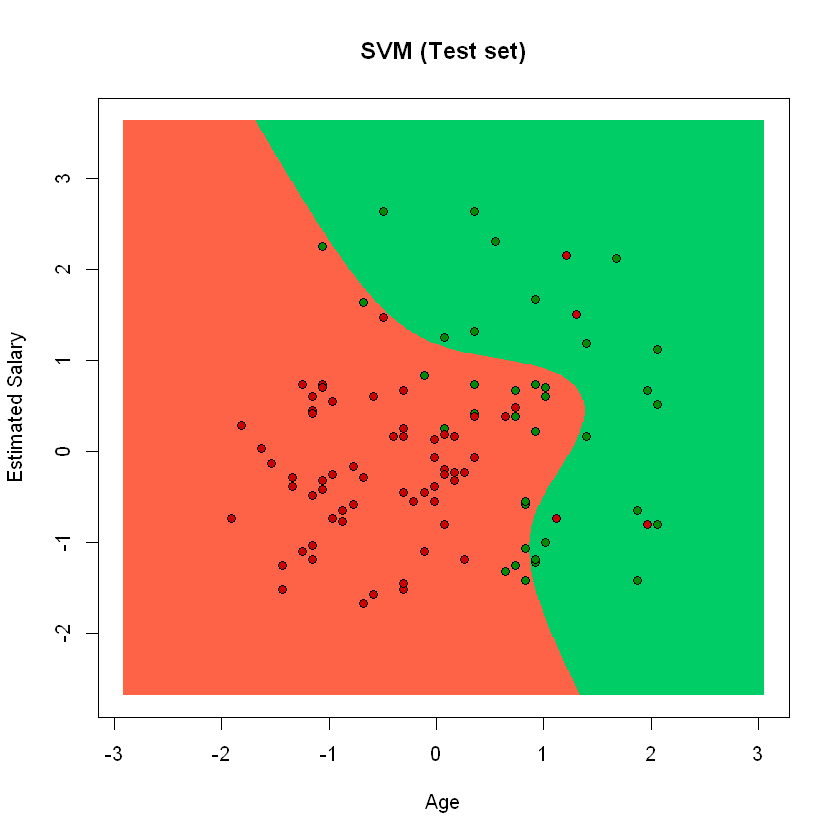

In [17]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Error rate has incresed so linear SVM is a good fit rather than polynomial for this model

Fitting SVM(radial) to the Training set and Predicting the Test set results

In [20]:
library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')

Predicting the Test set results

In [21]:
y_pred = predict(classifier, newdata = test_set[-3])
y_pred

2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   1   1   1   0   0   1   0   0   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  1   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   1   0   0   1 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  1   0   1   1   1   0   1   1   1   1   1   1   1   0   1   0   1   0   0   1 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   1   0   0   1   1   0   1   0   1   1   1   1   0   1 
Levels: 0 1

Making the Confusion Matrix

In [22]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 58  6
  1  4 32


Visualising the Training set results

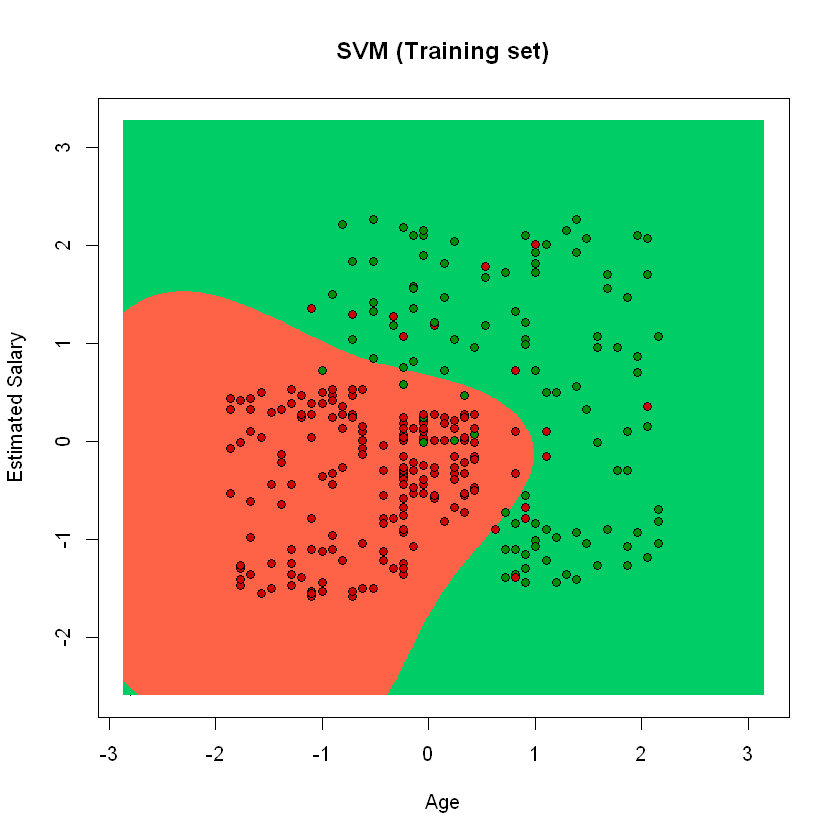

In [23]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Visualising the Test set results

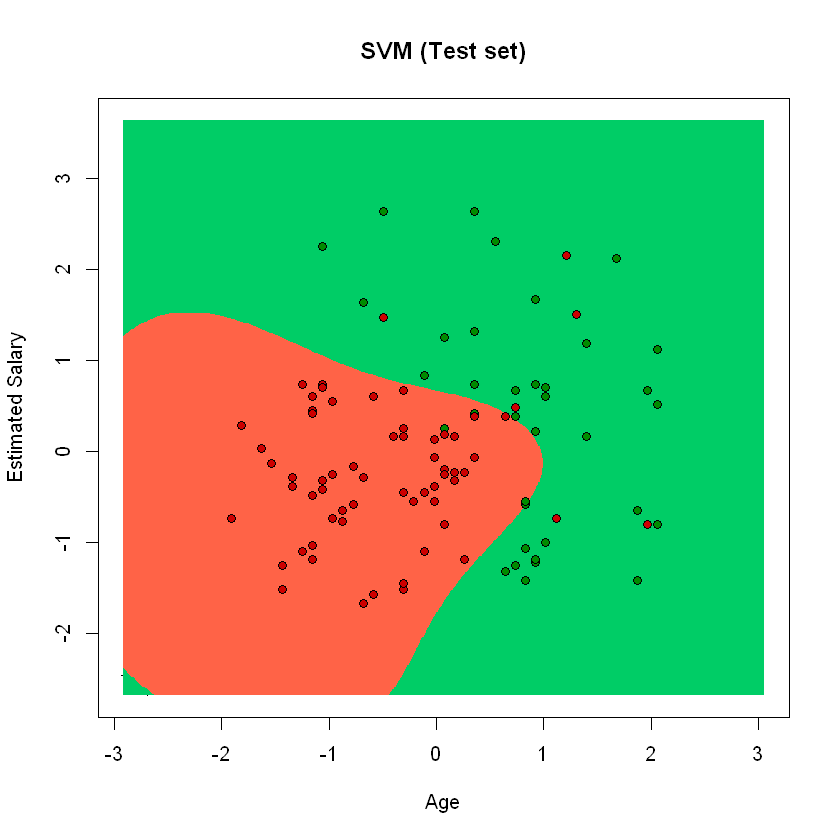

In [24]:

set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Error rate has decreased so radial SVM is a good fit rather than polynomial for this model